In [1]:
import pandas as pd

In [14]:
df = pd.read_csv("164_articles.csv").rename(columns={"body":"text"})

In [15]:
df

,Unnamed: 0,title,text,Url
0,0,Massachusetts Democrats decide fate of lawmake...,"A Democrat official in Framingham, Massachu...",https://www.foxnews.com/politics/massachusetts...
1,1,Democrat Ohio senator fundraises in Hollywood ...,Ohio residents tell Dr. Marc Siegel it’s li...,https://www.foxnews.com/politics/democrat-ohio...
2,2,DeSantis slams China’s COVID-19 ‘cover-up’ in ...,Axiom Strategies Founder and CEO Jeff Roe t...,https://www.foxnews.com/politics/desantis-slam...
3,3,"Biden admin quietly admits White House's 9,000...",CEO of Alaska Oil & Gas Association Kara Mo...,https://www.foxnews.com/politics/biden-admin-q...
4,4,COVID lab leak theory: Rand Paul says Biden sh...,The Big Sunday Show co-hosts weigh in on ...,https://www.foxnews.com/politics/covid-lab-lea...
...,...,...,...,...
159,159,Time is running out,Fox News congressional correspondent Chad P...,https://www.foxnews.com/politics/time-running-out
160,160,Trump mocks DeSantis at Pennsylvania rally: 'R...,Former President Trump mocked Gov. Ron DeSa...,https://www.foxnews.com/politics/trump-mocks-d...
161,161,Fetterman says he supports 'codifying' Roe v. ...,Pennsylvania U.S. Senate candidate John Fet...,https://www.foxnews.com/politics/fetterman-say...
162,162,Iowa poll shows Chuck Grassley ahead of Mike F...,"Sen. Chuck Grassley, R-Iowa., on pressing f...",https://www.foxnews.com/politics/iowa-poll-sho...


In [26]:
df = pd.read_csv("news.csv")

In [27]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [28]:
df['text_len'] = df['text'].apply(len)
df['title_len'] = df['title'].apply(len)
df['text_word_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df['title_word_len'] = df['title'].apply(lambda x: len(x.split(' ')))

<Axes: xlabel='label'>

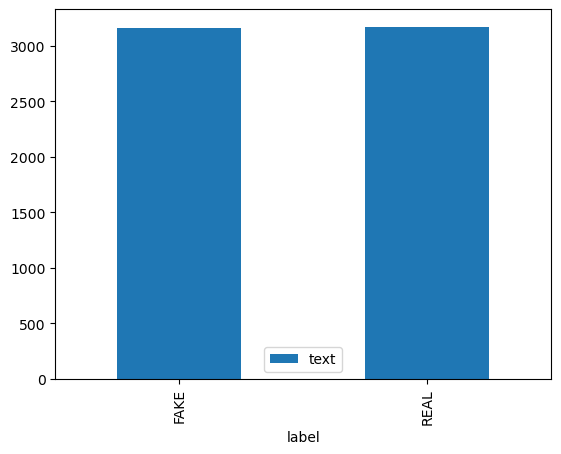

In [29]:
df.groupby('label').count().reset_index().plot.bar(y='text', x='label')

array([[<Axes: title={'center': 'text_len'}>]], dtype=object)

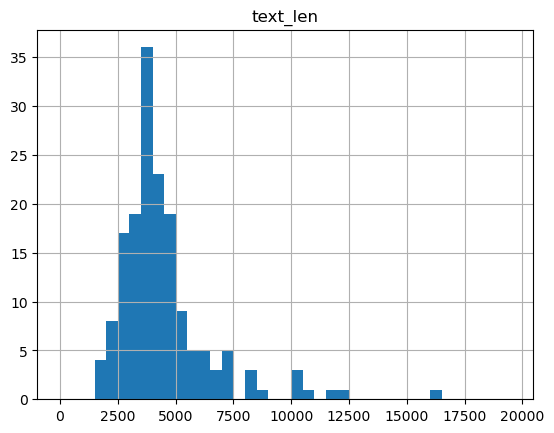

In [18]:
df.hist(column='text_len', bins=range(0, 20000, 500))

array([[<Axes: title={'center': 'title_len'}>]], dtype=object)

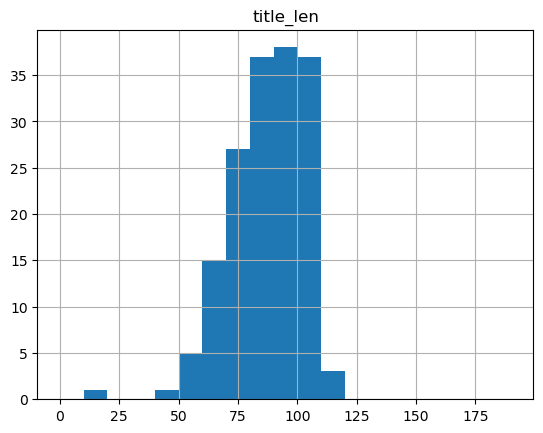

In [19]:
df.hist(column='title_len', bins=range(0, 200, 10))

array([[<Axes: title={'center': 'title_word_len'}>]], dtype=object)

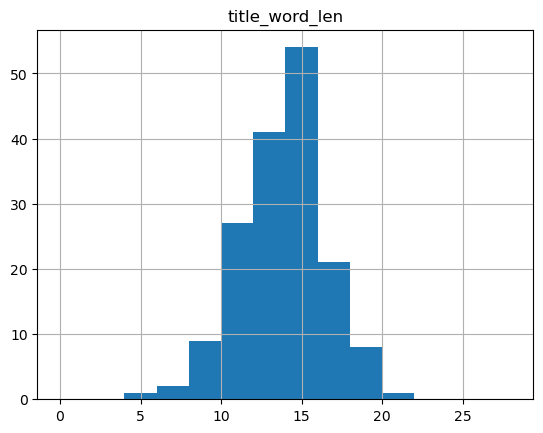

In [20]:
df.hist(column='title_word_len', bins=range(0, 30, 2))

In [21]:
df.hist(column='title_word_len', by='label', bins=range(0, 30, 2))

KeyError: 'label'

array([[<Axes: title={'center': 'text_word_len'}>]], dtype=object)

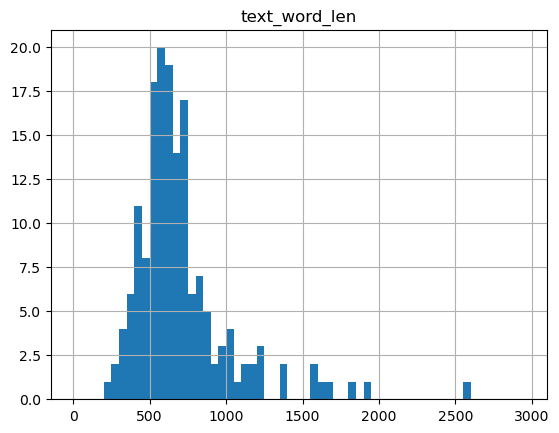

In [22]:
df.hist(column='text_word_len', bins=range(0, 3000, 50))

array([<Axes: title={'center': 'FAKE'}>, <Axes: title={'center': 'REAL'}>],
      dtype=object)

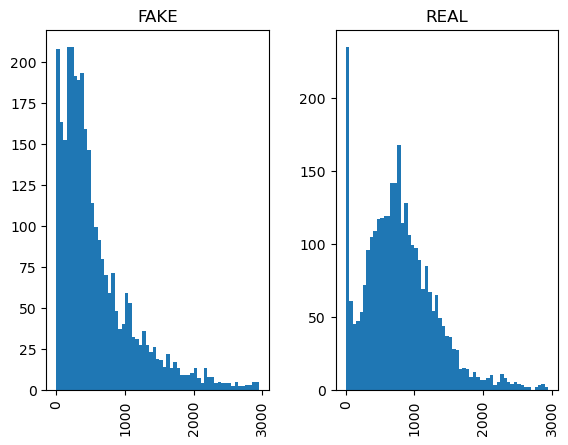

In [16]:
df.hist(column='text_word_len', by='label', bins=range(0, 3000, 50))

In [24]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

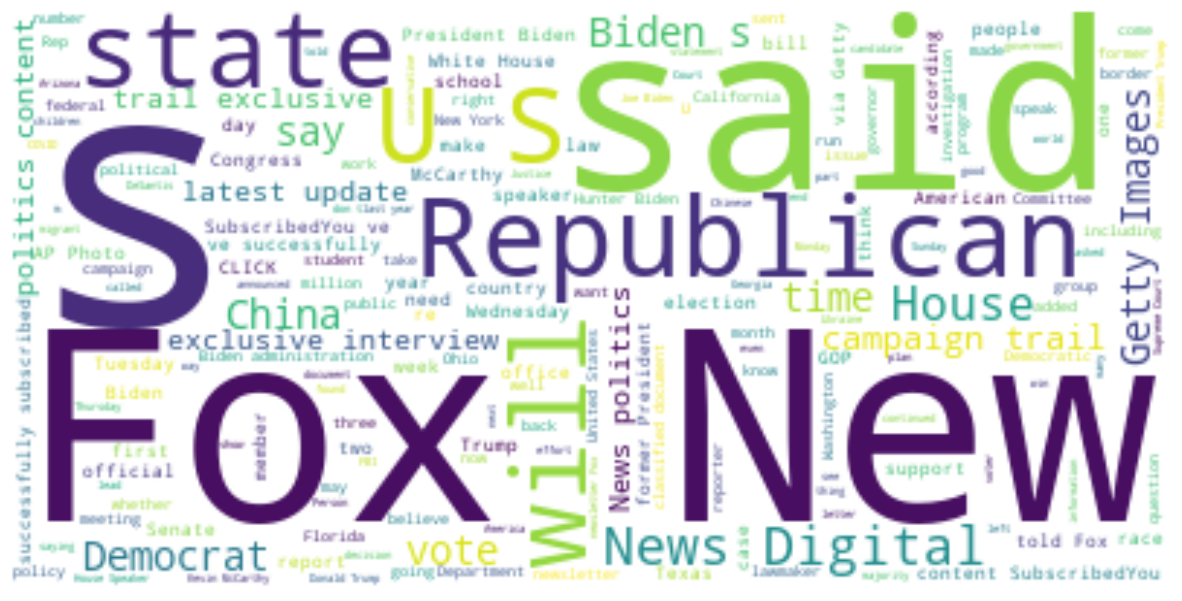

In [25]:
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

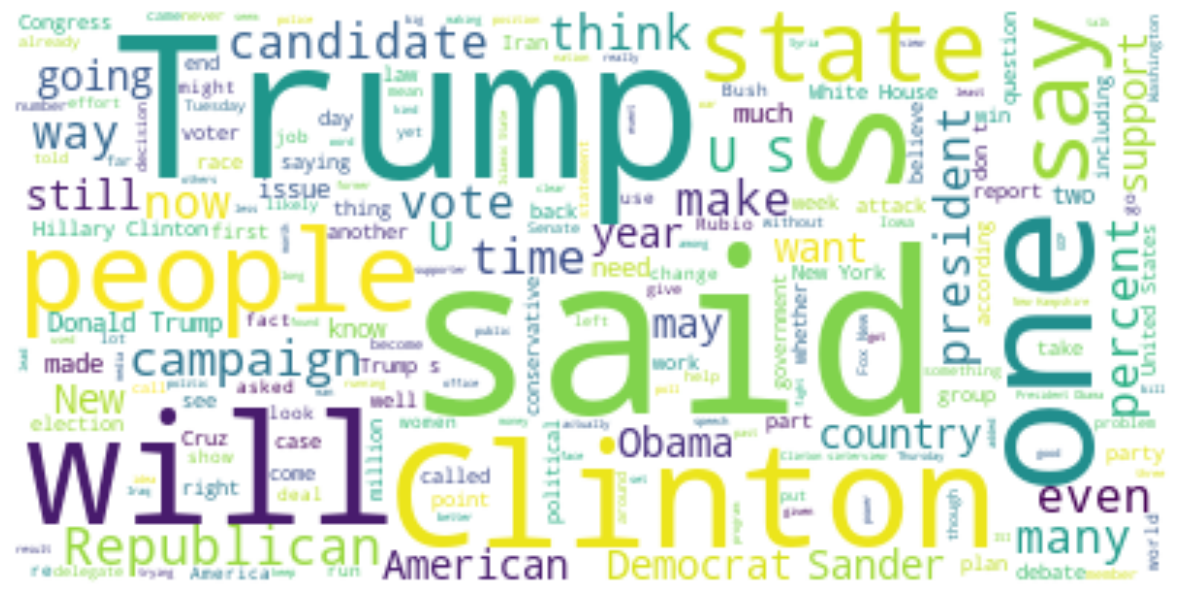

In [21]:
text = " ".join(i for i in df[df.label=='REAL'].text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()